# Code it: Syllable count for Walden stems

## Sample code

In [1]:
###########
## Setup ##
###########

## This new notebook is a new environment, so we have to set it up again.

# Import packages
from nltk import *
import pickle
import string
import pandas as pd
from nltk.corpus import cmudict
import matplotlib.pyplot as plt

# Custom function to count the syllables for each word passed to it
def syllables(word):
    # Only look up the word if it's in CMUdict (set of 134,000 words)
    if word in cmu:
        # If it's in CMUdict, print the number of digits in the transcription
        return max([len([y for y in x if y[-1] in string.digits])
                    for x in cmu[word]])

# Import the Walden data we cleaned and tokenized
walden_tokens = pickle.load( open( "../working/walden_clean_tokens.pkl", "rb" ) )

# Stem the tokens with teh Porter stemmer
walden_stems = [PorterStemmer().stem(t) for t in walden_tokens]

# Create a shortcut to the CMUdict produnciation dictionary as 'cmudict.dict()'
cmu = cmudict.dict()

In [2]:
##################
## Loop version ##
##################

# Loops require an empty list
walden_stems_sylls = []

# Loop each stem in walden_stems
for stem in walden_stems:
    
    # Get the syllable count using our custom function
    syll_count = syllables( stem )
    
    # If the word is missing from CMUdict, it will return 'None'--filter those out
    if syll_count != None:
    
        # Add the syllable count to the list
        walden_stems_sylls.append( syll_count )

################################
## List comprehension version ##
################################

# Return the syllable count for each stem in walden stems, if it isn't missing from CMUdict
walden_stems_sylls = [syllables(stem) for stem in walden_stems if syllables(stem) != None]

Text(0.5, 1.0, 'Syllable Frequency in Walden Stems')

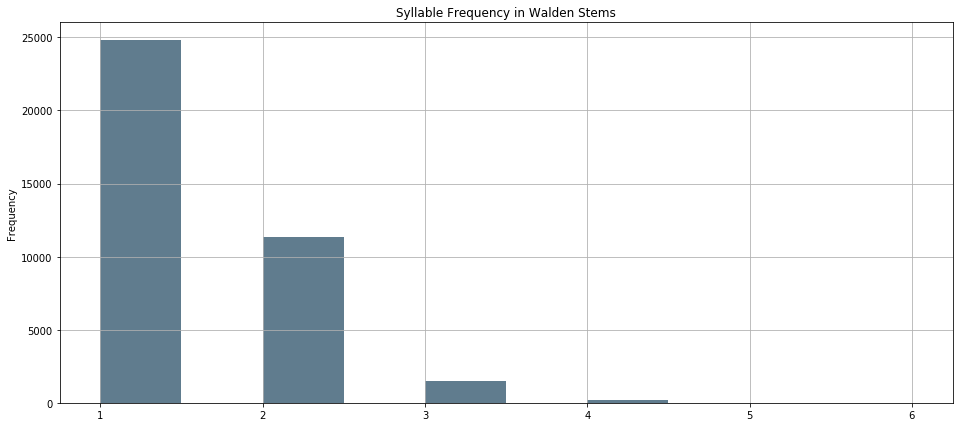

In [3]:
#############################################
## Plot the distribution of syllable count ##
#############################################

# Convert the list of counts to a pandas series for easy plotting
walden_stems_sylls = pd.Series(walden_stems_sylls)

# Set the figure size to fill the notebook
plt.rcParams["figure.figsize"] = [16,7]

# Plot a histogram of the syllable counts
walden_stems_sylls.plot.hist(grid=True, rwidth=2,
                   color='#607c8e')

# Let's also add a title to our plot
plt.title('Syllable Frequency in Walden Stems')